INTRODUCTION

DATA CLEANING

In [112]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import os
import math

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

df1 = pd.read_csv(os.path.join(
    'datasets_for_exercises','steps.csv'), delimiter=';')

In [90]:
df2 = pd.read_csv(os.path.join(
    'datasets_for_exercises','survey.csv'))

In [91]:
df = pd.merge(df1, df2, on = 'id')

In [92]:
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [6]:
df['city'].describe()

count       929
unique        4
top       Lille
freq        505
Name: city, dtype: object

In [7]:
df['gender'].describe()

count      929
unique       2
top       Male
freq       494
Name: gender, dtype: object

In [8]:
df['age'].describe()

count       929
unique        6
top       25-34
freq        426
Name: age, dtype: object

In [9]:
df['hh_size'].describe()

count    929.000000
mean       2.342304
std        1.226129
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: hh_size, dtype: float64

In [10]:
df['education'].describe()

count    929.000000
mean       2.530678
std        1.274491
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: education, dtype: float64

In [11]:
df['education_1'].describe()

count                     929
unique                      6
top       Master or doctorate
freq                      412
Name: education_1, dtype: object

In [12]:
df['height'].describe()

count    928.000000
mean     171.668103
std        9.080235
min      145.000000
25%      165.000000
50%      172.000000
75%      179.000000
max      195.000000
Name: height, dtype: float64

In [13]:
df['weight'].describe()

count    927.000000
mean      72.833873
std       25.902717
min        6.000000
25%       61.000000
50%       71.000000
75%       81.000000
max      700.000000
Name: weight, dtype: float64

In [14]:
df= df[(df['weight'] < 200) & (df['weight'] > 40)]

In [15]:
df['steps_per_participant'] = df.loc[:,'20-6-2013':'13-5-2014'].mean(axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,steps_per_participant
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630


In [16]:
df_sub = df[['id', 'city',	'gender',	'age',	'hh_size',	'education',	'education_1',	'height',	'weight',	'steps_per_participant']].copy()

In [17]:
df_sub

,id,city,gender,age,hh_size,education,education_1,height,weight,steps_per_participant
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630
...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6282.131868
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4799.880000
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,10030.326829
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,15679.679012


In [93]:
df_sub = df_sub.dropna()
df_sub

,id,city,gender,age,hh_size,education,education_1,height,weight,steps_per_participant,BMI,BMI_Status
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438,Obesity
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432,Normal Weight
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284,Overweight
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337,Overweight
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423,Normal Weight
...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6282.131868,21.671258,Normal Weight
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4799.880000,24.414062,Normal Weight
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,10030.326829,21.672110,Normal Weight
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,15679.679012,21.971336,Normal Weight


Feature engineering
The prediction of the model can be improved by computing a variable that gives a better indication of a healthy weight than weight alone. Can you think of one? If not, just skip this step.

-> bmi
bmi = weight(kg) / height^2 (m^2)
Underweight = <18.5
Normal weight = 18.5–24.9
Overweight = 25–29.9
Obesity = BMI of 30 or greater

In [94]:
df_sub['BMI'] = df_sub['weight'] /  ( (df_sub['height'] / 100) * (df_sub['height'] / 100) )

df_sub.loc[df_sub['BMI'] < 18.5, 'BMI_Status'] = 'Underweight'
df_sub.loc[(df_sub['BMI'] >= 18.5) & (df_sub['BMI'] < 25), 'BMI_Status'] = 'Normal Weight'
df_sub.loc[(df_sub['BMI'] >= 25) & (df_sub['BMI'] < 30), 'BMI_Status'] = 'Overweight'
df_sub.loc[df_sub['BMI'] >= 30, 'BMI_Status'] = 'Obesity'
df_sub


C:\Users\Bernd\AppData\Local\Temp\ipykernel_27056\2475803696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['BMI'] = df_sub['weight'] /  ( (df_sub['height'] / 100) * (df_sub['height'] / 100) )


,id,city,gender,age,hh_size,education,education_1,height,weight,steps_per_participant,BMI,BMI_Status
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438,Obesity
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.423313,23.765432,Normal Weight
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284,Overweight
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.200000,25.249337,Overweight
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.129630,21.872423,Normal Weight
...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,Lille,Female,45-54,3,4,Master or doctorate,165.0,59.0,6282.131868,21.671258,Normal Weight
925,926,Lille,Male,<25,3,5,Bachelor,192.0,90.0,4799.880000,24.414062,Normal Weight
926,927,Montpellier,Male,35-44,2,2,Bachelor,181.0,71.0,10030.326829,21.672110,Normal Weight
927,928,Lille,Female,55-64,1,1,High school,172.0,65.0,15679.679012,21.971336,Normal Weight


Exploratory data analysis

See last week for the first part (distribution of steps). In addition:
Make a scatterplot matrix of the numerical variables
Make a correlation matrix of the numerical variables
Describe and interpret the results

In [95]:
df_subset_2 = df_sub[['id','hh_size','education','height','weight', 'steps_per_participant', 'BMI']]
df_subset_2.head()

,id,hh_size,education,height,weight,steps_per_participant,BMI
0,1,4,4,178.0,98.0,10205.521212,30.930438
1,2,1,3,180.0,77.0,5687.423313,23.765432
2,3,2,2,180.0,83.0,8301.729730,25.617284
3,4,1,1,178.0,80.0,3633.200000,25.249337
4,5,3,4,167.0,61.0,5312.129630,21.872423


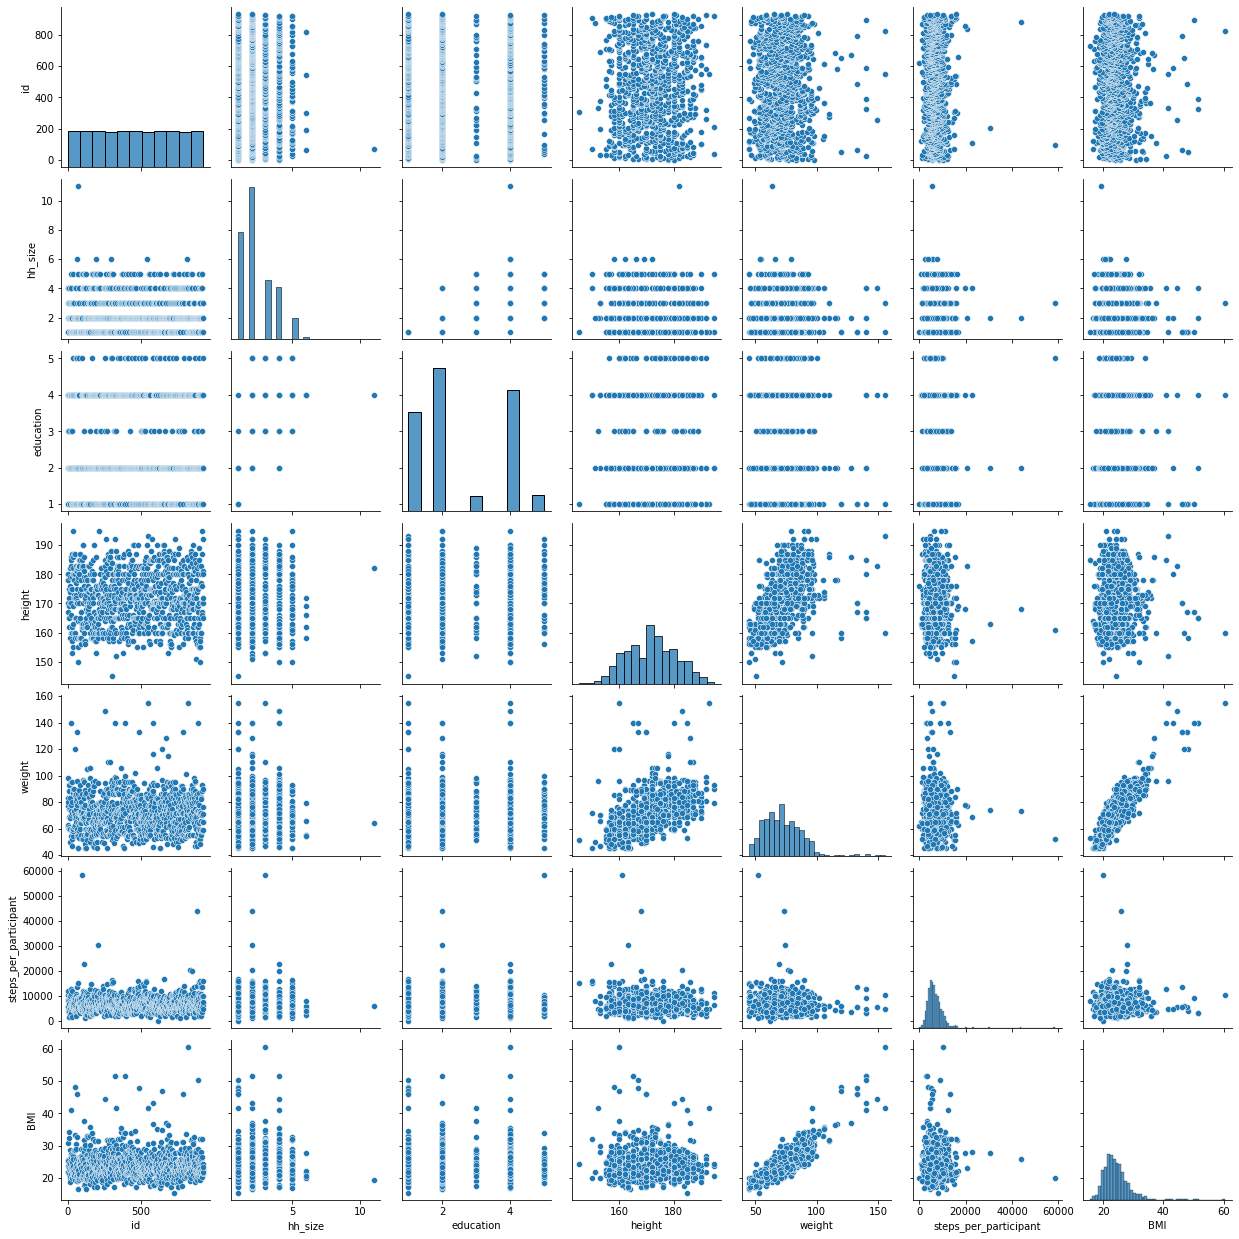

In [96]:
df_subset_2 = df_subset_2.loc[df_subset_2['steps_per_participant'] < 100000]
sns.pairplot(df_subset_2)
plt.show()


In [97]:
corr = df_subset_2.corr() 
corr

,id,hh_size,education,height,weight,steps_per_participant,BMI
id,1.000000,-0.017090,-0.006090,0.026693,0.009114,0.016617,-0.003842
hh_size,-0.017090,1.000000,0.824350,-0.051505,0.003597,0.033102,0.032378
education,-0.006090,0.824350,1.000000,-0.036510,0.004663,0.035478,0.024278
height,0.026693,-0.051505,-0.036510,1.000000,0.509197,-0.090653,0.020766
weight,0.009114,0.003597,0.004663,0.509197,1.000000,-0.068865,0.866104
steps_per_participant,0.016617,0.033102,0.035478,-0.090653,-0.068865,1.000000,-0.026169
BMI,-0.003842,0.032378,0.024278,0.020766,0.866104,-0.026169,1.000000


There are only weak correlations with steps_per_participant

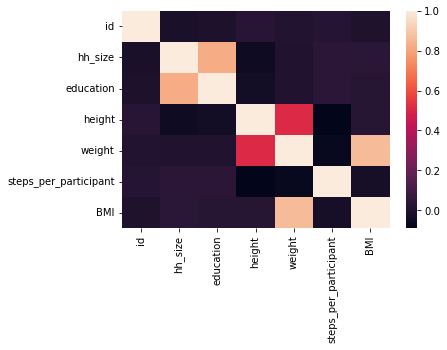

In [98]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

Predictive model
Explain linear regression in your own words
Create dummy variables for the categorical variables
Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).
Evaluation
Evaluate the model on the test data
Predictive power of the model (R2, RMSE)
Investigate the residuals
Describe and interpret the results
Conclusion

In [99]:

df_sub['city'].unique()



array(['Bordeaux', 'Lille', 'Montpellier', 'Lyon'], dtype=object)

In [100]:
df_sub['gender'].unique()


array(['Male', 'Female'], dtype=object)

In [101]:
df_sub['age'].unique()


array(['25-34', '35-44', '<25', '45-54', '55-64', '65+'], dtype=object)

In [102]:
df_sub['BMI_Status'].unique()

array(['Obesity', 'Normal Weight', 'Overweight', 'Underweight'],
      dtype=object)

In [103]:
df_df_sub = pd.get_dummies(df_sub, columns = ['city', 'gender', 'age', 'BMI_Status'])
df_df_sub

,id,hh_size,education,education_1,height,weight,steps_per_participant,BMI,city_Bordeaux,city_Lille,...,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,BMI_Status_Normal Weight,BMI_Status_Obesity,BMI_Status_Overweight,BMI_Status_Underweight
0,1,4,4,Master or doctorate,178.0,98.0,10205.521212,30.930438,1,0,...,1,0,0,0,0,0,0,1,0,0
1,2,1,3,Bachelor,180.0,77.0,5687.423313,23.765432,0,1,...,0,1,0,0,0,0,1,0,0,0
2,3,2,2,Master or doctorate,180.0,83.0,8301.729730,25.617284,0,0,...,1,0,0,0,0,0,0,0,1,0
3,4,1,1,Bachelor,178.0,80.0,3633.200000,25.249337,0,0,...,0,0,0,0,0,1,0,0,1,0
4,5,3,4,Bachelor,167.0,61.0,5312.129630,21.872423,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,925,3,4,Master or doctorate,165.0,59.0,6282.131868,21.671258,0,1,...,0,0,1,0,0,0,1,0,0,0
925,926,3,5,Bachelor,192.0,90.0,4799.880000,24.414062,0,1,...,0,0,0,0,0,1,1,0,0,0
926,927,2,2,Bachelor,181.0,71.0,10030.326829,21.672110,0,0,...,0,1,0,0,0,0,1,0,0,0
927,928,1,1,High school,172.0,65.0,15679.679012,21.971336,0,1,...,0,0,0,1,0,0,1,0,0,0


In [105]:
y = df_df_sub['steps_per_participant'] #We need to take out the rating as our Y-variable
x = df_df_sub.drop(['steps_per_participant', 'id', 'education_1'], axis=1)
x.index = df_df_sub['id'] 

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #split the data, store it into different variables
x_train.head() #The train data

,hh_size,education,height,weight,BMI,city_Bordeaux,city_Lille,city_Lyon,city_Montpellier,gender_Female,...,age_25-34,age_35-44,age_45-54,age_55-64,age_65+,age_<25,BMI_Status_Normal Weight,BMI_Status_Obesity,BMI_Status_Overweight,BMI_Status_Underweight
id,,,,,,,,,,,,,,,,,,,,,
535,3,4,176.0,65.0,20.983988,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
713,1,1,170.0,55.0,19.031142,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
684,2,2,178.0,115.0,36.295922,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
249,1,1,170.0,64.0,22.145329,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,0
261,2,2,175.0,73.0,23.836735,0,0,0,1,1,...,0,0,0,1,0,0,1,0,0,0


In [109]:
lm = LinearRegression() #create the model
model = lm.fit(x_train, y_train) #train the model

In [110]:
coef = pd.DataFrame(x.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-506.354075,hh_size
601.020412,education
181.174971,height
-227.913125,weight
753.093284,BMI
-143.615347,city_Bordeaux
837.179367,city_Lille
-295.785365,city_Lyon
-397.778655,city_Montpellier
596.759509,gender_Female


We can interpret these coefficients as follows:

* The intercept makes no sense and does not need to be interpreted. Why not? Because it's the value when all X's are 0. So "weight", "height" etc are 0, which is impossible.
hh_size: For each hh_member, the steps change by -506.354075
education: For each education lvl, the steps increase by 601.020412	
height: For each cm, the steps increase by 181.174971
weight: For each kg, the steps change by -227.913125
BMI: For each BMI-Point, the steps increase by 753.093284	
city_Bordeaux: If the person is from the city_Bordeaux, the steps change by -143.615347
city_Lille: If the person is from the city_Lille, the steps change by 837.179367	
city_Lyon: If the person is from the city_Lyon, the steps change by -295.785365	
city_Montpellier: If the person is from the city_Montpellie, the steps change by -397.778655	
gender_Female: If the person has the gender female, it adds 596.759509 to the steps
gender_Male:  If the person has the gender female, it adds -596.759509 to the steps
age_25-34: If the person is in the age range 25-34 it adds -739.237239 to the steps
age_35-44: If the person is in the age range 35-44 it adds -360.011900 to the steps
age_45-54: If the person is in the age range 45-54 it adds -360.849485 to the steps
age_55-64: If the person is in the age range 55-64 it adds 1508.244998 to the steps
age_65+: If the person is above 65 it adds -924.124022 to the steps
age_<25: If the person is below 25 it adds 875.977648 to the steps
BMI_Status_Normal Weight: If the Person has the bmi status normal, it adds 220.092348 to the steps
BMI_Status_Obesity: If the Person has the bmi status Obesity, it adds -1302.267373 to the steps
BMI_Status_Overweight: If the Person has the bmi status Overweight, it adds 721.273860 to the steps
BMI_Status_Underweight: If the Person has the bmi status Underweight, it adds 360.901164 to the steps

MODEL PERFORMANCE (on the test data)

In [117]:
y_test_p = lm.predict(x_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

-0.12162886753142388

The R^2 is -0.12162886753142388. Which means a horizontal line explains the data better than the model. (https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean#:~:text=R2%20can%20be%20negative,did%20not%20set%20an%20intercept)

In [113]:
math.sqrt(mean_squared_error(y_test, y_test_p))

3591.1713419240446

The RMSE is 3591.17. Which means that we are typically about 3591.17 off in our predicted steps (Most steps are in the range of 5000-10000).

c:\Users\Bernd\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


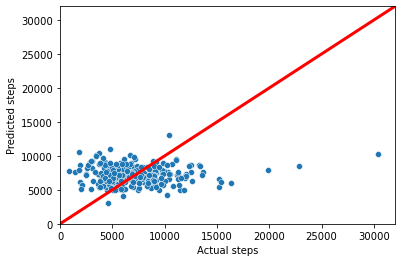

In [116]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual steps')
plt.ylabel('Predicted steps')
plt.xlim([0,32000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0,32000])
plt.plot([0, 32000], [0, 32000], color='red', lw=3) #Plot a diagonal length
plt.show()

The predictions are quite bad. The model predicts the steps in the actual range of 0 to 4000 too high (plotted above the line)
in the range of 5000-9000 too high and too low (above and below the line), but there is a shift that it starts with most predictions being to high at the start of the interval to most predictions being to low at the end of the interval -> inbetween it might be doing okay
and after 10000 too low (below the line)